In [1]:
import os
from ase.io import read
from utils.utils import xyz_to_xy, xyz_to_xy_withmono, trans_pos_to_label, data_init, xyz_to_xy_withmono_adsorb
from abtem import show_atoms
import shutil
from tqdm import tqdm
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import pandas as pd

In [2]:
# 读取atom_list
atoms_list = []
num_pos = 100
psize = 10
formula = "MoTe2"
load_file = os.path.join('atoms', f'atoms_{formula}_psize={psize}_pos={num_pos}')
for i in range(num_pos):
    filename = os.path.join(load_file, f'{i}.json')
    atoms_list.append(read(filename, format='json'))

In [ ]:
show_atoms(atoms_list[0], plane='xy', scale=0.5)

In [3]:
# 生成label Full
pos_mo = []
pos_te_single = []
pos_te_double = []
scale = psize/10
width = 12

for atoms in atoms_list:
    atoms_mo_2H_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
    atoms_te_2H_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]
    atoms_mo_1T_temp = atoms[[atom.index for atom in atoms if atom.symbol=='C']]
    atoms_te_1T_temp =  atoms[[atom.index for atom in atoms if atom.symbol=='H']]
    
    pos_mo_2H_temp = xyz_to_xy(atoms_mo_2H_temp.get_positions())
    pos_te_single_2H_temp, pos_te_double_2H_temp = xyz_to_xy_withmono(atoms_te_2H_temp.get_positions())
    pos_mo_1T_temp = xyz_to_xy(atoms_mo_1T_temp.get_positions())
    pos_te_single_1T_temp = xyz_to_xy(atoms_te_1T_temp.get_positions())
    
    pos_mo.append(np.vstack((pos_mo_2H_temp, pos_mo_1T_temp))/scale)
    pos_te_single.append(np.vstack((pos_te_single_2H_temp, pos_te_single_1T_temp))/scale)
    pos_te_double.append(pos_te_double_2H_temp/scale)

label_mo = trans_pos_to_label(pos_mo, width)
label_te_single = trans_pos_to_label(pos_te_single, width)
label_te_double = trans_pos_to_label(pos_te_double, width)

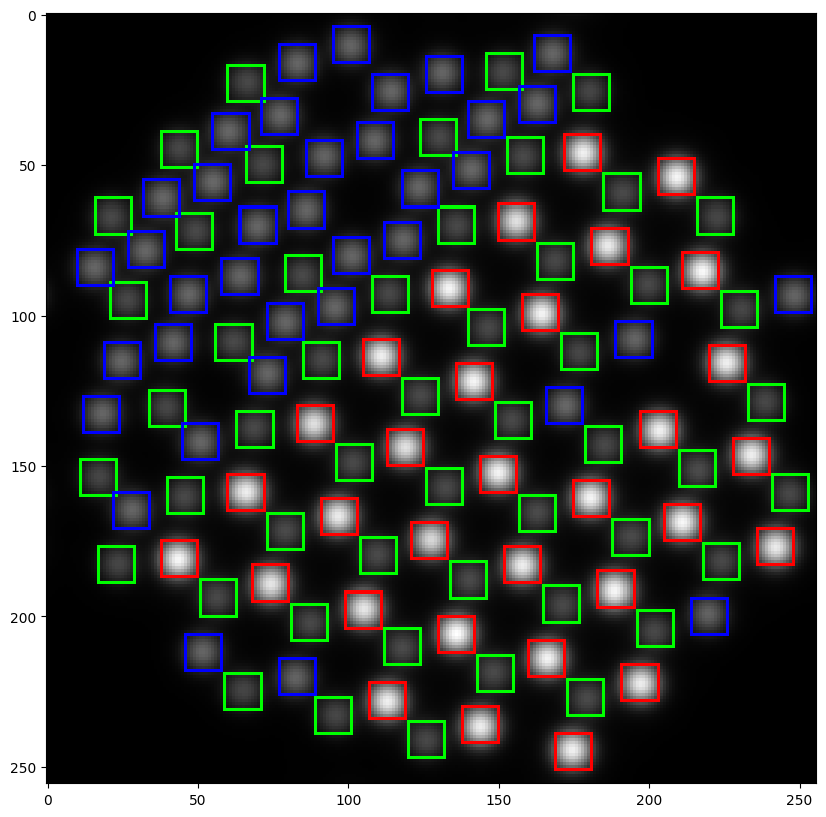

In [4]:
# label可视化
index = 50
num_total = 4000
data_file = "./datas" + f"/data_{formula}_psize={psize}_pos={num_pos}_total={num_total}"
with Image.open(data_file+f'/{index}_0.png') as img:
    image = data_init(np.array(img).astype(np.float32))
    image = cv2.cvtColor((image-np.min(image))/(np.max(image)-np.min(image)),cv2.COLOR_GRAY2BGR)
    for i in range(label_mo[index].shape[0]):
        x1, y1, x2, y2 = label_mo[index][i]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 1)
    for i in range(label_te_single[index].shape[0]):
        x1, y1, x2, y2 = label_te_single[index][i]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1)
    for i in range(label_te_double[index].shape[0]):
        x1, y1, x2, y2 = label_te_double[index][i]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 1)
    # for i in range(label_mo_1T[index].shape[0]):
    #     x1, y1, x2, y2 = label_mo_1T[index][i]
    #     x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    #     cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 255), 1)
    # for i in range(label_te_single_1T[index].shape[0]):
    #     x1, y1, x2, y2 = label_te_single_1T[index][i]
    #     x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    #     cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 255), 1)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

In [ ]:
# 生成label 2H
pos_mo = []
pos_te_single = []
pos_te_double = []
scale = psize/10
width = 15

for i in range(len(atoms_list)):
    atoms = atoms_list[i]
    atoms_mo_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
    atoms_te_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]

    pos_mo_ = xyz_to_xy(atoms_mo_temp.get_positions())
    pos_single, pos_double = xyz_to_xy_withmono(atoms_te_temp.get_positions())
    pos_mo_[:, [0, 1]] = pos_mo_[:, [1, 0]]
    pos_single[:, [0, 1]] = pos_single[:, [1, 0]]
    pos_double[:, [0, 1]] = pos_double[:, [1, 0]]
    pos_mo.append(pos_mo_/scale)
    pos_te_single.append(pos_single/scale)
    pos_te_double.append(pos_double/scale)
    
label_mo_2H = trans_pos_to_label(pos_mo, width)
label_te_single_2H = trans_pos_to_label(pos_te_single, width)
label_te_double_2H = trans_pos_to_label(pos_te_double, width)

label_mo_1T = [np.empty((0, 4), dtype=np.float32) for _ in range(num_pos)]
label_te_single_1T = [np.empty((0, 4), dtype=np.float32) for _ in range(num_pos)]

In [ ]:
# label可视化
index = 0
num_total = 4000
data_file = "./datas" + f"/data_{formula}_psize={psize}_pos={num_pos}_total={num_total}"
with Image.open(data_file+f'/{index}_0.png') as img:
    image = data_init(np.array(img).astype(np.float32))
    image = cv2.cvtColor((image-np.min(image))/(np.max(image)-np.min(image)),cv2.COLOR_GRAY2BGR)
    for i in range(label_mo_2H[index].shape[0]):
        x1, y1, x2, y2 = label_mo_2H[index][i]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 1)
    for i in range(label_te_single_2H[index].shape[0]):
        x1, y1, x2, y2 = label_te_single_2H[index][i]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1)
    for i in range(label_te_double_2H[index].shape[0]):
        x1, y1, x2, y2 = label_te_double_2H[index][i]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 1)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

In [ ]:
# 保存文件
save_file = './fasterrcnn_labels' + f'/label_{formula}_psize={psize}_pos={num_pos}_width={width}_'
if os.path.exists(save_file):
    shutil.rmtree(save_file)
    print(f"Folder '{save_file}' and its contents have been deleted.")
os.makedirs(save_file)

for i in tqdm(range(num_pos)):
    np.save(save_file + f'/{i}_mo_2H', label_mo_2H[i])
    np.save(save_file + f'/{i}_te_single_2H', label_te_single_2H[i])
    np.save(save_file + f'/{i}_te_double_2H', label_te_double_2H[i])
    np.save(save_file + f'/{i}_mo_1T', label_mo_1T[i])
    np.save(save_file + f'/{i}_te_single_1T', label_te_single_1T[i])

In [ ]:
# 生成label 2H-adsorb
pos_mo = []
pos_te_single = []
pos_te_double = []
pos_te_adsorb = []
width = 14
up_bound = 4.190004
down_bound = 1.000012

def condition_func(value, down_bound, up_bound):
    return (value < down_bound) | (value > up_bound)

for i in range(len(atoms_list)):
    atoms = atoms_list[i]
    atoms_mo_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
    atoms_te_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]

    pos_mo_ = xyz_to_xy(atoms_mo_temp.get_positions())
    pos_single, pos_double, pos_adsorb = xyz_to_xy_withmono_adsorb(atoms_te_temp.get_positions(), lambda x: condition_func(x, down_bound, up_bound))
    df_mo = pd.DataFrame(pos_mo_, columns=['col1', 'col2'])
    df_te_adsorb = pd.DataFrame(pos_adsorb, columns=['col1', 'col2'])
    result = df_mo.merge(df_te_adsorb, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1).values
    # pos_mo_[:, [0, 1]] = pos_mo_[:, [1, 0]]
    # pos_single[:, [0, 1]] = pos_single[:, [1, 0]]
    # pos_double[:, [0, 1]] = pos_double[:, [1, 0]]
    # pos_adsorb[:, [0, 1]] = pos_adsorb[:, [1, 0]]
    pos_mo.append(result)
    pos_te_single.append(pos_single)
    pos_te_double.append(pos_double)
    pos_te_adsorb.append(pos_adsorb)
    
label_mo = trans_pos_to_label(pos_mo, width)
label_te_single = trans_pos_to_label(pos_te_single, width)
label_te_double = trans_pos_to_label(pos_te_double, width)
label_te_adsorb = trans_pos_to_label(pos_te_adsorb, width)

In [ ]:
# label可视化
index = 3
num_total = 4000
data_file = "./datas" + f"/data_{formula}_psize={psize}_pos={num_pos}_total={num_total}"
with Image.open(data_file+f'/{index}_0.png') as img:
    image = data_init(np.array(img).astype(np.float32))
    image = cv2.cvtColor((image-np.min(image))/(np.max(image)-np.min(image)),cv2.COLOR_GRAY2BGR)
    for i in range(label_mo[index].shape[0]):
        x1, y1, x2, y2 = label_mo[index][i]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 1)
    for i in range(label_te_single[index].shape[0]):
        x1, y1, x2, y2 = label_te_single[index][i]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1)
    for i in range(label_te_double[index].shape[0]):
        x1, y1, x2, y2 = label_te_double[index][i]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 1)
    for i in range(label_te_adsorb[index].shape[0]):
        x1, y1, x2, y2 = label_te_adsorb[index][i]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 255), 1)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)

In [ ]:
# 保存文件
save_file = './fasterrcnn_labels' + f'/label_{formula}_pos={num_pos}_width={width}'
if os.path.exists(save_file):
    shutil.rmtree(save_file)
    print(f"Folder '{save_file}' and its contents have been deleted.")
os.makedirs(save_file)

for i in tqdm(range(num_pos)):
    np.save(save_file + f'/{i}_mo', label_mo[i])
    np.save(save_file + f'/{i}_te_single', label_te_single[i])
    np.save(save_file + f'/{i}_te_double', label_te_double[i])
    np.save(save_file + f'/{i}_te_adsorb', label_te_adsorb[i])

In [ ]:
# 生成label 1T'
pos_mo = []
pos_te_single = []
scale = psize/10
width = 14

for i in range(len(atoms_list)):
    atoms = atoms_list[i]
    atoms_mo_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Mo']]
    atoms_te_temp = atoms[[atom.index for atom in atoms if atom.symbol=='Te']]

    pos_mo_ = xyz_to_xy(atoms_mo_temp.get_positions())
    pos_single = xyz_to_xy(atoms_te_temp.get_positions())
    # pos_mo_[:, [0, 1]] = pos_mo_[:, [1, 0]]
    # pos_single[:, [0, 1]] = pos_single[:, [1, 0]]
    pos_mo.append(pos_mo_/scale)
    pos_te_single.append(pos_single/scale)

label_mo = trans_pos_to_label(pos_mo, width)
label_te_single = trans_pos_to_label(pos_te_single, width)
label_te_double = [np.empty((0, 4), dtype=np.float32) for _ in range(num_pos)]

In [ ]:
# label可视化
index = 0
num_total = 4000
data_file = "./datas" + f"/data_{formula}_psize={psize}_pos={num_pos}_total={num_total}"
with Image.open(data_file+f'/{index}_0.png') as img:
    image = data_init(np.array(img).astype(np.float32))
    image = cv2.cvtColor((image-np.min(image))/(np.max(image)-np.min(image)),cv2.COLOR_GRAY2BGR)
    for i in range(label_mo[index].shape[0]):
        x1, y1, x2, y2 = label_mo[index][i]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 1)  # Green
    for i in range(label_te_single[index].shape[0]):
        x1, y1, x2, y2 = label_te_single[index][i]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Blue
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

In [5]:
# 保存文件
save_file = './fasterrcnn_labels' + f'/label_{formula}_psize={psize}_pos={num_pos}_width={width}_c=3'
if os.path.exists(save_file):
    shutil.rmtree(save_file)
    print(f"Folder '{save_file}' and its contents have been deleted.")
os.makedirs(save_file)

for i in tqdm(range(num_pos)):
    np.save(save_file + f'/{i}_mo', label_mo[i])
    np.save(save_file + f'/{i}_te_single', label_te_single[i])
    np.save(save_file + f'/{i}_te_double', label_te_double[i])

100%|██████████| 100/100 [00:19<00:00,  5.26it/s]
